<a id='3_tutorial'></a>
# Tutorial 3

In this part of the tutorial and with all required data built and available in correspondent folders, we'll obtain an air temperature interpolated field. For this purpose we'll use PyMica class, which needs as parameters the following ones:

   - data_file: The path of the .json file with the point data
   - variables_file: A list of the file(s) path(s) containing the fields of the explanatory variables used in the regression. For more information on these fields, please see [Explanatory data](../preprocessing/pre_processing.ipynb) section.
   - clusters: A dictionary with two keys {'clusters_files': path for the clusters definitions, 'mask files': path for the rasterized clusters}. Form more information on these fields, please see [Clusters](../preprocessing/pre_processing.ipynb) section.
   - data_format: A dictionary with the name of the variables in the data file if they are not named as the default option. Defaults to ```{'loc_vars': ('lon', 'lat'), 'id_key': 'id', 'y_var': 'temp', 'x_vars': ('altitude', 'dist')}```

Before starting with different interpolation examples, we must import the PyMica class. We also import matplotlib in order to plot the result.

In [1]:
import matplotlib.pyplot as plt
from pymica.pymica import PyMica

Since data_file, variables_file and data_format will be the same for the examples below, we'll define them now.

In [2]:
data_file = '../sample-data/data/xema_20181231_1400.json'
variables_file = ['../sample-data/explanatory/cat_dem_25831.tif',
                  '../sample-data/explanatory/cat_distance_coast.tif']
data_format = {'loc_vars': ('lon', 'lat'),
               'id_key': 'id',
               'y_var': 'temp',
               'x_vars': ('altitude', 'dist')}

The examples in this tutorial are:

   - [3.1 Interpolation without clusters](#int_noclusters)
   - [3.2 Interpolation with one number of clusters](#int_onecluster)
   - [3.3 Interpolation with more than one number of clusters](#int_clusters)
 
    

<a id='int_noclusters'></a>
### 3.1 Interpolation without clusters

In this example, no clusters will be considered, then ```clusters``` PyMica class parameter will be set to ```None```. 

In [3]:
clusters = None

Now, we're ready to call PyMica class!

In [4]:
noclusters_int = PyMica(data_file, variables_file, clusters, data_format)

Now we can save the result into a .tif file using PyMica ```save_file``` function:

In [5]:
noclusters_int.save_file('../sample-data/results/no_cluster_int.tif')

But, we can also plot a quick look of the interpolated field, with ```noclusters_int``` result attribute.

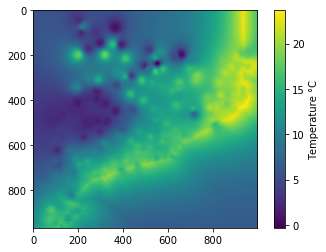

In [6]:
plt.imshow(noclusters_int.result)
cbar = plt.colorbar()
cbar.set_label('Temperature \u00b0C')
plt.show()

<a id='int_onecluster'></a>
### 3.2 Interpolation with one number of clusters

Now, we'll consider number of clusters 2. Rembember that PyMica will only keep those clusters that reduce the error of the field obtained when no clusters are considered.

Then, we set ```clusters``` parameters as follows:

In [7]:
clusters = {'clusters_files':['../sample-data/clusters/clusters_2.json'],
            'mask_files':['../sample-data/clusters/clusters_2_mask']}

And now, we call PyMica class:

In [8]:
cluster_2_int = PyMica(data_file, variables_file, clusters, data_format)

Now we can save the result into a .tif file using PyMica ```save_file``` function:

In [9]:
cluster_2_int.save_file('../sample-data/results/cluster_2_int.tif')

But, we can also plot a quick look of the interpolated field, with ```cluster_2_int``` result attribute.

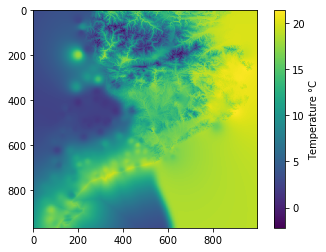

In [10]:
plt.imshow(cluster_2_int.result)
cbar = plt.colorbar()
cbar.set_label('Temperature \u00b0C')
plt.show()

<a id='int_clusters'></a>
### 3.3 Interpolation with more than one number of clusters

Now, we'll consider number of clusters 2 and 4. Rembember that PyMica will only keep those number of clusters that reduce the error of the field obtained when no clusters are considered.

Then, we set ```clusters``` parameters as follows:

In [11]:
clusters = {'clusters_files':['../sample-data/clusters/clusters_2.json',
                              '../sample-data/clusters/clusters_4.json'],
            'mask_files':['../sample-data/clusters/clusters_2_mask',
                          '../sample-data/clusters/clusters_4_mask']}

And now, we call PyMica class:

In [12]:
clusters_int = PyMica(data_file, variables_file, clusters, data_format)

Now we can save the result into a .tif file using PyMica ```save_file``` function:

In [13]:
clusters_int.save_file('../sample-data/results/clusters_4_int.tif')

But, we can also plot a quick look of the interpolated field, with ```clusters_int``` result attribute.

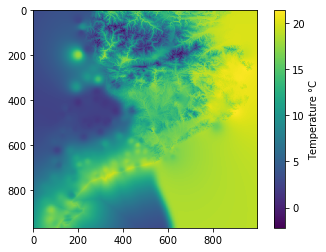

In [14]:
plt.imshow(clusters_int.result)
cbar = plt.colorbar()
cbar.set_label('Temperature \u00b0C')
plt.show()

## Finish!

#### Now you can modify and change data, add more number of clusters, design your own clusters...!